In [1]:
from brainpipe.system import study
from os.path import isfile, join, exists
from os import makedirs
import numpy as np
from itertools import product
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook

### T-tests to compare AUC and Time btw ROIs

In [2]:
from scipy.stats import ttest_ind, sem
from mne.stats import fdr_correction
st = study('Olfacto')
pathdata = join(st.path, 'figure/01_LDA_TPSim_E_by_cond/')
path2save = join(pathdata, 'AUC_Time_By_freq_region/' )
###############################################################################
if not exists(path2save):
    makedirs(path2save)
###############################################################################

#freqs = ['2_theta', '3_alpha', '4_beta','5_gamma1','6_gamma2']
freqs = ['0_theta', '1_alpha','2_beta','3_gamma']
freqnames = [freq[2:] for freq in freqs]
rois = ['Frontal','Olf','MTL']
dfname = '2_all_subjects_info_elecs_AUC_Signif_th_0.01_mean.csv'
df = pd.read_csv(pathdata+dfname)

auc = np.array([])
for freq in freqs:     
    #keep only significant electrodes (boolean col keep only 1 value)     
    df_freq = pd.concat([df[['subjects','region','s_Mai_RL']],df.filter(like=freq)], axis=1)
    df_freq = df_freq.loc[df_freq.iloc[:,-1] > 0]
    #df_freq = df_freq.loc[df_freq['s_Mai_RL'].isin(['Amg','Amg-PirT','OFC','Ins','pPirT','HC','PHG'])]
    #df_freq.loc[df_freq['s_Mai_RL'] == 'Amg-PirT', 's_Mai_RL'] = 'pPirT'
    
    AUC_0 = df_freq[freq+'_AUC'].loc[df_freq['region']=='Frontal']
    AUC_1 = df_freq[freq+'_AUC'].loc[df_freq['region']=='Olf']
    AUC_2 = df_freq[freq+'_AUC'].loc[df_freq['region']=='MTL']    
    T0, p0 = ttest_ind(AUC_0,AUC_1,equal_var=False)
    T1, p1 = ttest_ind(AUC_0,AUC_2,equal_var=False)     
    T2, p2 = ttest_ind(AUC_2,AUC_1,equal_var=False)     
    _,pvals = fdr_correction([p0,p1,p2],alpha=0.01)     
    print(freq,'AUC',T0,p0,T1,p1,T2,p2)     
    print(pvals)     
    print('AUC frontal', np.mean(AUC_0), sem(AUC_0))
    print('AUC Olf', np.mean(AUC_1), sem(AUC_1))
    print('AUC MTL', np.mean(AUC_2), sem(AUC_2))
    
    #AUC_0 = df_freq[freq+'_AUC'].loc[df_freq['s_Mai_RL']=='Amg']
    #AUC_1 = df_freq[freq+'_AUC'].loc[df_freq['s_Mai_RL']=='pPirT']
    #AUC_2 = df_freq[freq+'_AUC'].loc[df_freq['s_Mai_RL']=='OFC']
    #AUC_3 = df_freq[freq+'_AUC'].loc[df_freq['s_Mai_RL']=='Ins']
    #AUC_4 = df_freq[freq+'_AUC'].loc[df_freq['s_Mai_RL']=='PHG']
    #AUC_5 = df_freq[freq+'_AUC'].loc[df_freq['s_Mai_RL']=='HC']
    #T0, p0 = ttest_ind(AUC_0,AUC_1,equal_var=False)
    #T1, p1 = ttest_ind(AUC_0,AUC_2,equal_var=False)
    #T2, p2 = ttest_ind(AUC_0,AUC_3,equal_var=False)
    #T3, p3 = ttest_ind(AUC_0,AUC_4,equal_var=False)
    #T4, p4 = ttest_ind(AUC_0,AUC_5,equal_var=False)
    #_,pvals = fdr_correction([p0,p1,p2,p3,p4],alpha=0.05)
    #print(freq,'AUC',p0,p1,p2,p3,p4)
    #print(pvals)
    
# df_freq = df.filter(like='AUC')
# for roi in rois:
#    AUC_freqs = []
#    for freq in freqs:
#        df2 = pd.concat([df[['subjects','region']],df_freq.filter(like=freq)], axis=1)
#        print(df2)
        
#        df2 = df2.loc(df['subjects']!='S3')
#        #df2 = df2.loc(df_freq.iloc[:,-1] > 0)
#        AUC = df2[freq+'_AUC'].loc[df2['region']==roi]
#        AUC_freqs.append(AUC)
#    pvals, Tvals = [],[]
#    for i,j in product(range(4),range(4)):
#        T0, p0 = ttest_ind(AUC_freqs[i],AUC_freqs[j],equal_var=False)
#        pvals.append(p0)
#        Tvals.append(T0)
#    _,pvals_c = fdr_correction(pvals,alpha=0.01) 
#    print(roi)
#    print(pvals_c)

-> Olfacto loaded
0_theta AUC -1.6780387754796087 0.09598235992347223 -1.159844751099094 0.24845803108102313 -0.49855645253725817 0.6191448722008759
[0.28794708 0.37268705 0.61914487]
AUC frontal 0.5135303932796749 0.012902133382374734
AUC Olf 0.548054970508648 0.016026207479940113
AUC MTL 0.5369343048446027 0.015514711359842384
1_alpha AUC 0.043950931526670164 0.96500795042752 0.7644396584673084 0.4461926065631281 -0.674264389542107 0.5016623197729728
[0.96500795 0.75249348 0.75249348]
AUC frontal 0.5291668729115871 0.011036020086315325
AUC Olf 0.5284234105842124 0.012819842591614575
AUC MTL 0.516026869714093 0.013178399982582627
2_beta AUC -0.3315584187134141 0.7407377884088961 -0.6031902209417854 0.547599205370265 0.25722180940043887 0.7974836368350343
[0.79748364 0.79748364 0.79748364]
AUC frontal 0.5356717468849567 0.011991687850858445
AUC Olf 0.5420371360469242 0.014992590013157713
AUC MTL 0.5476419347747248 0.01581187582048262
3_gamma AUC 0.506771981112949 0.6131064334365522 -0.

### Compute power values for High and Low perf across subjects

In [6]:
from scipy.stats import ttest_ind, sem
from mne.stats import fdr_correction
st = study('Olfacto')
pathdata = join(st.path, 'figure/01_LDA_TPSim_E_by_cond/')
path2save = join(pathdata, 'AUC_Time_By_freq_region/' )
###############################################################################
if not exists(path2save):
    makedirs(path2save)
###############################################################################

#freqs = ['2_theta', '3_alpha', '4_beta','5_gamma1','6_gamma2']
freqs = ['0_theta', '1_alpha','2_beta','3_gamma']
freqnames = [freq[2:] for freq in freqs]
dfname = '2_all_subjects_info_elecs_AUC_Signif_th_0.01_mean.csv'
df = pd.read_csv(pathdata+dfname)

for i,freq in enumerate(freqs):     
    #keep only significant electrodes (boolean col keep only 1 value)     
    df_freq = pd.concat([df[['subjects','region','s_Mai_RL']],df.filter(like=freqnames[i])], axis=1)
    df_freq = df_freq.loc[df_freq.iloc[:,-1] > 0]
#     print(df_freq)
    # compute the mean and std values of power to normalize
    df_freq['pow_all'] = (df[freq+'_Pow0']+df[freq+'_Pow1'])/2
    df_su = df_freq[['pow_all','s_Mai_RL','subjects']].groupby(['subjects']).agg(['mean','std'])
    
    # allocate the same mean value for each subjects
    df_su.columns = df_su.columns.droplevel()
    dict_su = df_su.to_dict()
    df_freq['pow_mean'] = df_freq['subjects'].map(dict_su['mean'])
    df_freq['pow_std'] = df_freq['subjects'].map(dict_su['std'])
    df_freq['z_pow0'] = (df_freq[freq+'_Pow0'] - df_freq['pow_mean'])/df_freq['pow_std']
    df_freq['z_pow1'] = (df_freq[freq+'_Pow1'] - df_freq['pow_mean'])/df_freq['pow_std']
    df_freq.loc[df_freq['s_Mai_RL'] == 'Amg-PirT', 's_Mai_RL'] = 'pPirT'
    
    # select specific regions of interest in the file
    sel_rois = ['OFC']
    df_freq = df_freq[df_freq['s_Mai_RL'].isin(sel_rois)]
    
    # print the NORMALIZED mean and std values across subjects by ROIs
    df2 = df_freq[['z_pow0','z_pow1','s_Mai_RL','subjects']].groupby(['s_Mai_RL','subjects']).agg(['mean','sem'])
    # print the RAW mean and std values across subjects by ROIs
    df3 = df_freq[[freq+'_Pow0',freq+'_Pow1','s_Mai_RL','subjects']].groupby(['s_Mai_RL','subjects']).agg(['mean','sem'])
    print(df_freq[['subjects',freq+'_Pow0',freq+'_Pow1','s_Mai_RL']])

-> Olfacto loaded
    subjects  0_theta_Pow0  0_theta_Pow1 s_Mai_RL
91      FERJ      0.004987      0.217929      OFC
96      FERJ      0.020057      0.295877      OFC
123     LEFC      0.008771      0.297888      OFC
124     LEFC      0.046576      0.196355      OFC
125     LEFC      0.217083      0.004311      OFC
127     LEFC      0.030442      0.164662      OFC
161     PIRJ      0.377394      0.200164      OFC
178     SEMC      0.020209     -0.011153      OFC
179     SEMC      0.000585      0.061362      OFC
180     SEMC      0.054889      0.058104      OFC
202     SEMC      0.220312      0.120886      OFC
    subjects  1_alpha_Pow0  1_alpha_Pow1 s_Mai_RL
161     PIRJ     -0.000529      0.238633      OFC
164     PIRJ      0.248352      0.266712      OFC
198     SEMC      0.151731      0.212030      OFC
    subjects  2_beta_Pow0  2_beta_Pow1 s_Mai_RL
123     LEFC     0.007913     0.121819      OFC
125     LEFC     0.245107     0.025772      OFC
126     LEFC     0.265573     0.129259

In [ ]:
from scipy.stats import ttest_ind
from mne.stats import fdr_correction
from itertools import combinations
st = study('Olfacto')
pathdata = join(st.path, 'figure/LDA_TPSim_E_R_all_BBG_within/')
path2save = join(pathdata, 'AUC_Time_By_freq_region/' )
###############################################################################
if not exists(path2save):
    makedirs(path2save)
###############################################################################

freqs = ['0_theta', '1_alpha','2_beta','3_gamma']
#freqs = ['2_theta', '3_alpha', '4_beta','5_gamma1','6_gamma2']
freqnames = [freq[2:] for freq in freqs]
rois = ['Frontal','Olf','MTL']
dfname = '2_all_subjects_info_elecs_AUC_Signif_th_0.01_mean.csv'
df = pd.read_csv(pathdata+dfname)

for freq in freqs:
    auc , pow_f = [], []
    for roi in rois:
        #keep only significant electrodes (boolean col keep only 1 value)
        df_freq = pd.concat([df[['subjects','region']],df.filter(like=freq)], axis=1)
        df_freq = df_freq.loc[df_freq.iloc[:,-1] > 0]
        AUC_0 = df_freq[freq+'_AUC'].loc[df_freq['region']==roi].values
        POW = df_freq[freq+'_AUC'].loc[df_freq['region']==roi].values
        auc.append(AUC_0)
        print(freq,len(auc))
        print(roi, np.mean(AUC_0), np.std(AUC_0))
    print([s.shape for s in auc])
    

    T, p, comb = [], [], []
    for a,b in combinations(auc,2):
        T0, p0 = ttest_ind(a,b,equal_var=False)
        T.append(T0),p.append(p0) 

    _,pvals = fdr_correction(p,alpha=0.05)
    print(roi,'AUC',pvals)
    
#     AUC_0 = df_freq[freq+'_AUC'].loc[df_freq['Mai_RL']=='Amg']
#     AUC_1 = df_freq[freq+'_AUC'].loc[df_freq['Mai_RL']=='pPirT']
#     AUC_2 = df_freq[freq+'_AUC'].loc[df_freq['Mai_RL']=='OFC']
#     AUC_3 = df_freq[freq+'_AUC'].loc[df_freq['Mai_RL']=='Ins']
#     AUC_4 = df_freq[freq+'_AUC'].loc[df_freq['Mai_RL']=='PHG']
#     AUC_5 = df_freq[freq+'_AUC'].loc[df_freq['Mai_RL']=='HC']
#     T0, p0 = ttest_ind(AUC_0,AUC_1,equal_var=False)
#     T1, p1 = ttest_ind(AUC_0,AUC_2,equal_var=False)
#     T2, p2 = ttest_ind(AUC_0,AUC_3,equal_var=False)
#     T3, p3 = ttest_ind(AUC_0,AUC_4,equal_var=False)
#     T4, p4 = ttest_ind(AUC_0,AUC_5,equal_var=False)
#     _,pvals = fdr_correction(p0+p1+p2+p3+p4,alpha=0.05)
#     print(freq,'AUC',p0,p1,p2,p3,p4)

#### Plot AUC and Time by region for each frequency

In [9]:
st = study('Olfacto')
pathdata = join(st.path, 'figure/01_LDA_TPSim_E_by_cond/')
path2save = join(pathdata, 'AUC_Time_By_freq_region/' )
###############################################################################
if not exists(path2save):
    makedirs(path2save)
###############################################################################

#freqs = ['2_theta', '3_alpha', '4_beta','5_gamma1','6_gamma2']
freqs = ['0_theta', '1_alpha','2_beta','3_gamma']
freqnames = [freq[2:] for freq in freqs]

dfname = '2_all_subjects_info_elecs_AUC_Signif_th_0.01_mean.csv'
df = pd.read_csv(pathdata+dfname)
#print(df.columns)
#df.drop(['Unnamed: 0'],inplace=True, axis=1)

for f,freq in enumerate(freqs):
    #keep only significant electrodes (boolean col keep only 1 value)
    df_freq = pd.concat([df[['subjects','s_Mai_RL']],df.filter(like=freqnames[f])], axis=1)
    df_freq = df_freq.loc[df_freq.iloc[:,-1] > 0]
    df_freq.loc[df_freq['s_Mai_RL'] == 'Amg-PirT', 's_Mai_RL'] = 'pPirT'
    df_freq = df_freq.loc[df_freq['s_Mai_RL'].isin(['HC','IFG','MFG','SFG','Ins','pPirT','OFC'])]
    #df_freq = df_freq.loc[df_freq[freq+'_Pow1'] > df_freq[freq+'_Pow0']]
    #print(df_freq)
    
    #group result by region
    df_gr = df_freq.groupby(['s_Mai_RL']).agg(('count','mean','std','sem'))
    df_gr.to_csv(pathdata+'AUC_Time_by_roi_{}.csv'.format(freq))
    #print(df_gr.filter(like='AUC'))
    
#     #Plot Mean Time 
#     fig = plt.figure()
#     plt.title('Mean Decoding Time by region for '+freqnames[f])
#     plt.ylabel('Mean Time (ms)')
#     xticks, w = np.arange(0,df_gr.shape[0]), 0.8
#     time = df_gr.filter(like=('Time'))
#     plt.xticks(xticks,time.index.get_level_values(0).values)
#     plt.ylim(0,2000)
#     plt.bar(xticks,time.iloc[:,1]*100,yerr=time.iloc[:,3]*100, color='b')
#     plt.savefig(path2save+'Time_'+freq+'_signif_th_01.png')
#     plt.savefig(path2save+'Time_'+freq+'_signif_th_01.pdf')
#     plt.clf()
#     plt.close()
    
    #Plot Mean AUC Score
    fig = plt.figure()
    plt.title('Mean AUC Score by region for '+freqnames[f])
    plt.ylabel('Mean AUC')
    xticks, w = np.arange(0,df_gr.shape[0]), 0.8
    auc = df_gr.filter(like=('AUC'))
    print(auc)
    plt.xticks(xticks,auc.index.get_level_values(0).values)
    plt.ylim(0.5,0.8)
    plt.bar(xticks,auc.iloc[:,1],yerr=auc.iloc[:,3],color='darkorange')
    plt.savefig(path2save+'AUC_'+freq+'_signif_th_01.png')
    plt.savefig(path2save+'AUC_'+freq+'_signif_th_01.pdf')
    plt.clf()
    plt.close()

-> Olfacto loaded
         0_theta_AUC                              
               count      mean       std       sem
s_Mai_RL                                          
HC                10  0.603649  0.108713  0.034378
IFG                2  0.497597  0.316728  0.223960
Ins                1  0.642134       NaN       NaN
MFG                5  0.774147  0.039372  0.017608
OFC               11  0.554362  0.091890  0.027706
SFG                5  0.653923  0.179534  0.080290
pPirT              3  0.659335  0.053124  0.030671
         1_alpha_AUC                              
               count      mean       std       sem
s_Mai_RL                                          
HC                 7  0.635034  0.055746  0.021070
IFG                4  0.537214  0.154700  0.077350
Ins                3  0.593025  0.060286  0.034806
MFG                4  0.656561  0.075022  0.037511
OFC                3  0.475962  0.149943  0.086569
SFG                3  0.574845  0.127024  0.073337
         2_be

### Plot AUC and Time by region for all freqs

In [10]:
st = study('Olfacto')
pathdata = join(st.path, 'figure/01_LDA_TPSim_E_by_cond/')
path2save = join(pathdata, 'AUC_Time_By_freq_region/' )
###############################################################################
if not exists(path2save):
    makedirs(path2save)
###############################################################################

#freqs = ['2_theta', '3_alpha', '4_beta','5_gamma1','6_gamma2']
freqs = ['0_theta', '1_alpha','2_beta','3_gamma']

rois = ['Frontal','MTL','Olf']
freqnames = [freq[2:] for freq in freqs]

dfname = '2_all_subjects_info_elecs_AUC_Signif_th_0.01_mean.csv'
df = pd.read_csv(pathdata+dfname)
#df.drop(['Unnamed: 0'],inplace=True, axis=1)

result_auc = pd.DataFrame()
result_time = pd.DataFrame()
for freq in freqs:
    df2 = pd.concat([df[['subjects','region']],df.filter(like=freq[2:])], axis=1)
    df2 = df2.loc[df2.iloc[:,-1] > 0]
    #df2 = df2.loc[df2['s_Mai_RL'].isin(['Amg','Amg-PirT','OFC','Ins','pPirT','HC','PHG'])]
    #df2.loc[df2['s_Mai_RL'] == 'Amg-PirT', 's_Mai_RL'] = 'pPirT'
    df2 = df2.groupby(['region']).agg(('mean','sem'))
    auc = df2.filter(like='AUC')
    time = df2.filter(like='Time')
    pow_ = df2.filter(like='Pow')
    result_auc = pd.concat([result_auc, auc], axis=1)
    result_time = pd.concat([result_time, time], axis=1)
    print(freq, pow_)
print(result_auc, result_time)
dfsave = pd.concat([result_auc,result_time],ignore_index=False)
dfsave.to_csv(path2save+'AUC_Time_by_roi.csv')

for i,roi in enumerate(result_auc.index):
    print(roi)
    #Plot Mean AUC Score
    fig = plt.figure()
    plt.title('Mean AUC Score for '+roi)
    plt.ylabel('Mean AUC')
    xticks, w = np.arange(0,len(freqnames)), 0.9
    plt.xticks(xticks,freqnames)
    if roi == 'Amg':
        plt.ylim(0.4,0.7)
    elif roi == 'Olf':
        plt.ylim(0.4,0.7)
    else:
        plt.ylim(0.4,0.7)
    data = result_auc.iloc[i,np.arange(0,result_auc.shape[1],2)]
    plt.bar(xticks,data,yerr=result_auc.iloc[i,np.arange(1,result_auc.shape[1],2)],
            color='darkorange')
    #print(roi,'auc',data)
    plt.savefig(path2save+'AUC_'+roi+'_signif_th_01.png')
    plt.savefig(path2save+'AUC_'+roi+'_signif_th_01.pdf')
    plt.clf()
    plt.close()

#     #Plot Mean Time Score
#     fig = plt.figure()
#     plt.title('Mean Time Score for '+roi)
#     plt.ylabel('Mean Time (ms)')
#     xticks, w = np.arange(0,len(freqnames)), 0.8
#     plt.xticks(xticks,freqnames)
#     plt.ylim(0,1300)
#     data = (result_time.iloc[i,np.arange(0,result_time.shape[1],2)])*100
#     plt.bar(xticks,data, yerr=(result_time.iloc[i,np.arange(1,result_time.shape[1],2)])*100,
#             color='blue')
#     #print(roi,'time',data)
#     plt.savefig(path2save+'Time_'+roi+'_signif_th_01.png')
#     plt.savefig(path2save+'Time_'+roi+'_signif_th_01.pdf')
#     plt.clf()
#     plt.close()

-> Olfacto loaded
0_theta         0_theta_Pow0           0_theta_Pow1          
                mean       sem         mean       sem
region                                               
Frontal     0.287926  0.066943     0.113295  0.051781
MTL         0.082457  0.033166     0.203281  0.039276
Olf         0.107762  0.031614     0.155966  0.033323
1_alpha         1_alpha_Pow0           1_alpha_Pow1          
                mean       sem         mean       sem
region                                               
Frontal     0.117352  0.041658     0.117456  0.036346
MTL         0.193601  0.039973     0.069451  0.023408
Olf         0.117858  0.047371     0.161458  0.045120
2_beta         2_beta_Pow0           2_beta_Pow1          
               mean       sem        mean       sem
region                                             
Frontal    0.163728  0.046473    0.102186  0.030268
MTL        0.102852  0.026520    0.147963  0.032882
Olf        0.126979  0.037589    0.082647  0.031968

-> Olfacto loaded
['Frontal' 'MTL' 'Olf']
subjects    CHAFCHAFCHAFCHAFCHAFCHAFCHAFCHAFCHAFCHAFCHAFCH...
Name: Frontal, dtype: object


TypeError: unsupported operand type(s) for /: 'str' and 'int'

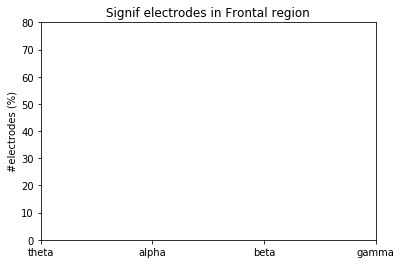

In [13]:
st = study('Olfacto')
pathdata = join(st.path, 'figure/01_LDA_TPSim_E_by_cond/')
path2save = join(pathdata, 'AUC_Time_By_freq_region/' )
###############################################################################
if not exists(path2save):
    makedirs(path2save)
###############################################################################

freqs = ['0_theta', '1_alpha','2_beta','3_gamma']
#freqs = ['2_theta', '3_alpha', '4_beta','5_gamma1','6_gamma2']
# nb_elecs = [143, 77, 92] #encoding
#nb_elecs = [144, 62, 75] #retrieval
nb_elecs = [141,62,75] #common encoding & retrieval
freqnames = [freq[2:] for freq in freqs]

dfname = '2_all_subjects_info_elecs_AUC_Signif_th_0.01_mean.csv'
df = pd.read_csv(pathdata+dfname)
#df.drop(['Unnamed: 0'],inplace=True, axis=1)
#print(df.filter(like=('min_win')))
df_roi = pd.concat([df[['subjects','region']],df.filter(like=('min_win'))],axis=1)
df_roi = df_roi.groupby(['region']).agg('sum')
rois = df_roi.index.get_level_values(0).values
print(rois)

#Plot number of signif electrodes
for i,roi in enumerate(rois):
    fig = plt.figure()
    plt.title('Signif electrodes in '+roi+' region')
    plt.ylabel('#electrodes (%)')
    xticks, w = np.arange(0,len(freqnames)), 0.8
    plt.xticks(xticks,freqnames)
    #plt.ylim(0,30) if roi == 'Frontal' else plt.ylim(0,12)
    plt.ylim(0,80)
    print(df_roi.iloc[i,:])
    data = (df_roi.iloc[i,:]/nb_elecs[i])*100
    print(roi,data)
    plt.bar(xticks,data,color='grey')
    plt.savefig(path2save+'Nb_elecs_'+roi+'_signif_th_01.png')
    plt.savefig(path2save+'Nb_elecs_'+roi+'_signif_th_01.pdf')
    plt.clf()
    plt.close()

### Plot the number of electrodes that decode in both encoding and retrieval by freq and region

In [ ]:
from os import listdir
from os.path import isfile, join
import numpy as np

th = '0.01'
freqs = ['0_theta', '1_alpha','2_beta','3_gamma']
#freqs = ['2_theta', '3_alpha', '4_beta','5_gamma1','6_gamma2']
rois_to_keep = ['ACC','Amg','Amg-PirT','HC','IFG','Ins','MFG','OFC','PHG',
            'SFG','pPirT']
#nb_elecs = [144, 62, 75] #retrieval
nb_elecs = [141,62,75] #common encoding & retrieval
###############################################################################
path = r'/media/karim/Datas4To/1_Analyses_Intra_EM_Odor/Olfacto/figure/'
path_npz_enc = join(path, '0_Classif_Power_E_EpiPerf_LowHigh_1000perm_BBG/')
path_npz_ret = join(path, '0_Classif_Power_R_EpiPerf_LowHigh_1000perm_BBG/')
npz_form = 'All_subjects_sources_{}_odor_low_high_sel_physFT.npz'
mask_form = 'All_subjects_mask_stat_{}_minwin1.0_th'+th+'.npy'
path2save = join(path, 'Conjonction/')
###############################################################################

for freq in freqs:
    mat_enc = np.load(path_npz_enc+npz_form.format(freq))
    idx_E = np.where([roi in rois_to_keep for roi in mat_enc['s_labels']])
    xyz0, labels0 = mat_enc['s_xyz'][idx_E], mat_enc['s_labels'][idx_E]
    mask0 = np.load(path_npz_enc+'masks_stat/'+mask_form.format(freq))
    
    mat_ret = np.load(path_npz_ret+npz_form.format(freq))
    idx_R = np.where([roi in rois_to_keep for roi in mat_ret['s_labels']])
    xyz1, labels1 = mat_ret['s_xyz'][idx_R], mat_ret['s_labels'][idx_R]
    mask1 = np.load(path_npz_ret+'masks_stat/'+mask_form.format(freq))
    
    xyz_all = np.unique(np.concatenate((xyz0,xyz1),axis=0),axis=0)
    #print(xyz0.shape,xyz1.shape,xyz_all.shape)
    
    #create an array of region labels for encoding and retrieval
    dict_regions ={ 'ACC':'Frontal','IFG':'Frontal','MFG':'Frontal','SFG':'Frontal',
                'Amg':'Olf','pPirT':'Olf','Amg-PirT':'Olf','Ins':'Olf','OFC':'Olf',
                'HC':'MTL','PHG':'MTL'}
    regions0 = np.vectorize(dict_regions.get)(labels0)
    regions1 = np.vectorize(dict_regions.get)(labels1)

    #loop on all elecs and create a code indicating when it decodes
    codes_elecs, region_elecs = [], []
    for i, elec in enumerate(xyz_all):
        in_1 = np.where(np.all(elec == xyz0, 1))[0] #encoding
        in_2 = np.where(np.all(elec == xyz1, 1))[0] #retrieval

        if in_1.size and in_2.size: #decode in both
            sig0,sig1 = mask0[in_1], mask1[in_2]
            if sig0 == False and sig1 == False:
                codes_elecs.append(2)
                region_elecs.append(regions0[in_1][0])
            if sig0 == False and sig1 == True:
                codes_elecs.append(0)
                region_elecs.append(regions0[in_1][0])
            if sig0 == True and sig1 == False:
                codes_elecs.append(1)
                region_elecs.append(regions1[in_2][0])
        if in_1.size and not in_2.size: #decode only in encoding
            if mask0[in_1] == False:
                codes_elecs.append(0)
                region_elecs.append(regions0[in_1][0])
        if not in_1.size and in_2.size: #decode only in retrieval
            if mask1[in_2] == False:
                codes_elecs.append(1)
                region_elecs.append(regions1[in_2][0])
    
    codes_elecs = np.asarray(codes_elecs)[np.newaxis]
    region_elecs = np.asarray(region_elecs)[np.newaxis]
    count = np.ones(shape=region_elecs.shape)
    #print(freq,'regions',region_elecs.shape,codes_elecs.shape, count.shape)
    concat = np.concatenate((codes_elecs,region_elecs,count),axis=0).swapaxes(0,1)
    df = pd.DataFrame(concat,columns=['codes_elecs','region_elecs','count'])
    df_gr = df.groupby(['codes_elecs','region_elecs']).count()
    df_gr = df_gr.unstack(level=0).T
    codes = df_gr.index.get_level_values(1).values
    rois = df_gr.columns.get_level_values(0).values
    #print(df_gr, codes, rois)
    
    #Plot number of signif electrodes
    fig = plt.figure()
    plt.title('Signif electrodes for '+freq)
    plt.ylabel('#electrodes')
    xticks, w = np.arange(0,len(rois)), 0.8
    plt.xticks(xticks,rois)
    plt.ylim(0,100)
    #colors = ["#114693", "#DA0615", "#30169A"]
    colors = ["indigo","yellow","teal"]
    legends = ['Encoding','Retrieval','Both']
    bottom = np.zeros(len(df_gr.columns))
    for i,code in enumerate(codes):
        nb = df_gr.iloc[i,:]
        percent = [(nb[i]/nb_elecs[i])*100 for i in range(3)]
        print('percent',percent, [nb_elecs[i] for i in range(3)])
        plt.bar(xticks,percent,color=colors[i],bottom=bottom,label=legends[i])
        bottom += percent
    #print('count',freq,(df_gr.iloc[i,:]/nb_elecs[i])*100)
    plt.legend(loc='best')
    plt.savefig(path2save+'Nb_elecs_'+freq+'_signif_th_01.png')
    plt.savefig(path2save+'Nb_elecs_'+freq+'_signif_th_01.pdf')
    plt.clf()
    plt.close()


### % of electrode decreases & increases across frequencies

In [22]:
# st = study('Olfacto')
pathdata = join(st.path, 'figure/01_LDA_TPSim_E_by_cond/')
path2save = join(pathdata, 'Power_By_freq_region/' )
###############################################################################
if not exists(path2save):
    makedirs(path2save)
###############################################################################
#freqs = ['2_theta', '3_alpha', '4_beta','5_gamma1','6_gamma2']
freqs = ['0_theta', '1_alpha','2_beta','3_gamma']
conds = ['low','high']
freqnames = [freq[2:] for freq in freqs]
###############################################################################
groups_roi = 's_Mai_RL'#'region'

dfname = '2_all_subjects_info_elecs_AUC_Signif_th_0.01_mean.csv'
df = pd.read_csv(pathdata+dfname)
#df.drop(['Unnamed: 0','aal', 'aal_RL', 'BA',
#       '2_theta_AUC', '3_alpha_AUC', '4_beta_AUC', '5_gamma1_AUC',
#       '6_gamma2_AUC','2_theta_Time', '3_alpha_Time', '4_beta_Time', '5_gamma1_Time',
#       '6_gamma2_Time'],inplace=True, axis=1)
#df.drop(['2_theta_AUC', '3_alpha_AUC', '4_beta_AUC', '5_gamma1_AUC',
#       '6_gamma2_AUC'],inplace=True, axis=1)
df.drop(['0_theta_AUC', '1_alpha_AUC', '2_beta_AUC', '3_gamma_AUC'],inplace=True, axis=1)
regions = np.unique(df[[groups_roi]]) #'region'
#print(regions)

for roi in regions:
    elecs_inc, elecs_dec, elecs_ratio = [],[],[]
    for f,freq in enumerate(freqs):
        #keep only significant electrodes (boolean col keep only 1 value)
        df_freq = pd.concat([df[['subjects','x',groups_roi]],df.filter(like=freqnames[f])], axis=1)
        df_freq = df_freq.loc[df_freq.iloc[:,-1] > 0]
        df_freq = df_freq.loc[df_freq.s_Mai_RL == roi]
        print(df_freq)
        df_freq['modulation'] = np.sign(df_freq[freq+'_Pow1'] - df_freq[freq+'_Pow0'])
        #create a value of 1 for increase, -1 for decrease and 0 for no change
        
        #compute signif elecs, increasing and decreasing elecs
        df_mod = df_freq[['x',groups_roi,'modulation']].groupby([groups_roi,'modulation']).count()
        #print(df_mod)
        if df_mod.size == 0:
            pass
        else:
            mod = df_mod.values[:]
            index0 = df_mod.index.get_level_values(1)[0]
            #print(mod,len(mod),index0)

            tot = [mod[0][0]+mod[1][0] if len(mod)==2 else mod[0][0]]
            inc = [(mod[1][0]/tot)*100 if len(mod)==2 else 0]
            inc = [(mod[0][0]/tot)*100 if len(mod)==1 and index0==1 else inc ]
            dec = [(mod[0][0]/tot)*100 if len(mod)==2 else 0]
            dec = [(mod[0][0]/tot)*100 if len(mod)==1 and index0==-1 else dec]
            #print('inc',inc,'dec',dec)
            elecs_ratio.append(tot[0]), elecs_inc.append(inc[0][0]), elecs_dec.append(dec[0][0])
    print(roi, elecs_ratio, elecs_inc, elecs_dec)
    #print('shapes inc dec', len(elecs_inc), len(elecs_dec))
    
    #Plot Mean Z-scored power
    fig = plt.figure()
    plt.title('Mean Power (SME) by freq for '+roi)
    plt.ylabel('% of signif elecs')
    xticks = np.arange(0,len(elecs_inc))
    
    plt.plot(xticks, elecs_inc, 'r-')
    plt.plot(xticks, elecs_dec, 'b-')
    plt.xticks(xticks,freqnames)
    plt.ylim(0,100)
    plt.savefig(path2save+'Percent_'+roi+'_signif_th_01.png')
    plt.savefig(path2save+'Percent_'+roi+'_signif_th_01.pdf')
    plt.clf()
    plt.close()
    

    subjects     x s_Mai_RL  0_theta_Pow0  0_theta_Pow1  sig_1levtheta
191     SEMC  11.9      ACC      0.121607      0.437176              1
    subjects      x s_Mai_RL  1_alpha_Pow0  1_alpha_Pow1  sig_1levalpha
116     LEFC   8.75      ACC     -0.006672      0.188793              1
191     SEMC  11.90      ACC      0.040650      0.425522              1
206     SEMC   8.90      ACC      0.024623      0.095322              1
Empty DataFrame
Columns: [subjects, x, s_Mai_RL, 2_beta_Pow0, 2_beta_Pow1, sig_1levbeta]
Index: []
    subjects      x s_Mai_RL  3_gamma_Pow0  3_gamma_Pow1  sig_1levgamma
118     LEFC  16.65      ACC      0.144034      0.017680              1
206     SEMC   8.90      ACC      0.016030      0.040058              1
214     SEMC  12.05      ACC      0.062585      0.001796              1
ACC [1, 3, 3] [100.0, 100.0, array([33.33333333])] [0, 0, array([66.66666667])]
    subjects      x s_Mai_RL  0_theta_Pow0  0_theta_Pow1  sig_1levtheta
64      FERJ  22.45       HC   

OFC [11, 3, 10, 8] [array([63.63636364]), 100.0, array([30.]), array([12.5])] [array([36.36363636]), 0, array([70.]), array([87.5])]
    subjects      x s_Mai_RL  0_theta_Pow0  0_theta_Pow1  sig_1levtheta
69      FERJ -23.05      PHG      0.010847      0.195043              1
88      FERJ  35.85      PHG     -0.023695      0.428753              1
89      FERJ  39.90      PHG      0.048629      0.268760              1
151     PIRJ  25.15      PHG      0.208791      0.042379              1
    subjects      x s_Mai_RL  1_alpha_Pow0  1_alpha_Pow1  sig_1levalpha
85      FERJ  23.75      PHG      0.386378      0.123771              1
87      FERJ  31.75      PHG      0.273640     -0.001438              1
88      FERJ  35.85      PHG      0.307342     -0.005304              1
152     PIRJ  29.10      PHG      0.004049      0.113876              1
154     PIRJ  37.05      PHG      0.114583      0.273465              1
155     PIRJ  41.05      PHG      0.006478     -0.007437              1
   

In [23]:
st = study('Olfacto')
pathdata = join(st.path, 'figure/01_LDA_TPSim_E_by_cond/')
path2save = join(pathdata, 'Power_By_freq_region/' )
###############################################################################
if not exists(path2save):
    makedirs(path2save)
###############################################################################
freqs = ['0_theta', '1_alpha','2_beta','3_gamma']
#freqs = ['2_theta','3_alpha','4_beta','5_gamma1','6_gamma2']
conds = ['low','high']
freqnames = [freq[2:] for freq in freqs]
###############################################################################
groups_roi = 's_Mai_RL'#'region'

dfname = '2_all_subjects_info_elecs_AUC_Signif_th_0.01_mean.csv'
df = pd.read_csv(pathdata+dfname)
#print(df.columns)
#df.drop(['aal', 'aal_RL', 'BA',
#       '2_theta_AUC', '3_alpha_AUC', '4_beta_AUC', '5_gamma1_AUC',
#       '6_gamma2_AUC','2_theta_Time', '3_alpha_Time', '4_beta_Time', '5_gamma1_Time',
#      '6_gamma2_Time'],inplace=True, axis=1)
df.drop(['0_theta_AUC', '1_alpha_AUC', '2_beta_AUC', '3_gamma_AUC'],inplace=True, axis=1)
#'4_ripples_AUC'
regions = np.unique(df[[groups_roi]]) #'region'

for roi in regions:
    for f,freq in enumerate(freqs):
    #keep only significant electrodes (boolean col keep only 1 value)
        df_freq = pd.concat([df[['subjects','s_Mai_RL','region']],df.filter(like=freqnames[f])], axis=1)
        df_freq = df_freq.loc[df_freq.iloc[:,-1] > 0]
        df_freq = df_freq.loc[df_freq.s_Mai_RL == roi]
        df_freq['modulation'] = np.sign(df_freq[freq+'_Pow1'] - df_freq[freq+'_Pow0'])
        df2 = df_freq[['modulation','s_Mai_RL','subjects','region']].groupby(['modulation','s_Mai_RL','subjects']).count()
        if len(df2) > 2 and freq == '4_ripples':
            print(roi,freq,df2)


-> Olfacto loaded
